__S&P 500 GARCH__

In [28]:
require(rugarch)
require(zoo)

SP <- read.csv("S&P_data.csv", header=T)
SP$RET <- log(SP$spindx[2:3355]/SP$spindx)

index <- as.Date(as.character(SP$DATE), "%Y%m%d")
ret <- zoo(SP$RET, as.Date(as.character(SP$DATE), "%Y%m%d"))

Warning message in SP$spindx[2:3355]/SP$spindx:
"longer object length is not a multiple of shorter object length"

In [29]:
SP <- SP[abs(SP$RET) < 0.12,]

In [30]:
spec <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean=FALSE))

data <- zoo
fit <- ugarchfit(data = ret, spec = spec, solver="hybrid")

vals <- coef(fit)
what <- coef(fit)[1]
ahat <- coef(fit)[2]
bhat <- coef(fit)[3]

In [31]:
jpeg(file="sp_vol_plot.jpeg")
plot(ret, ylim = c(-.05, .05), main = 'S&P 500', ylab = 'Return', xlab = 'Date')
dev.off()

png 
  2

In [32]:
print(what)
print(ahat)
print(bhat)

       omega 
1.191562e-06 
    alpha1 
0.08305225 
    beta1 
0.9094939 


In [33]:
SP_GARCH_LogLik = 10782.81

__S&P 500 GJR-GARCH__

In [34]:
spec2 <- ugarchspec(variance.model=list(model = "gjrGARCH", garchOrder=c(1,1,1)), mean.model=list(armaOrder=c(0,0), include.mean=F))
fit2 <- ugarchfit(data=ret, spec=spec2, solver="hybrid")

vals <- coef(fit2)
what <- coef(fit2)[1]
ahat <- coef(fit2)[2]
bhat <- coef(fit2)[3]
ghat <- coef(fit2)[4]

In [35]:
print(what)
print(ahat)
print(bhat)

       omega 
1.808114e-06 
      alpha1 
4.053369e-07 
  beta1 
0.90774 


In [36]:
SP_GJR_LogLik = 10850.99

In [37]:
SP_GJR_LogLik/SP_GARCH_LogLik

[1] 1.006323

__IBM GARCH__

In [18]:
require(rugarch)
require(zoo)

IBM <- read.csv("IBM-1999-2003.csv", header=T)

index <- as.Date(as.character(IBM$date), "%Y%m%d")
ret <- zoo(IBM$RET, as.Date(as.character(IBM$date), "%Y%m%d"))

In [19]:
IBM <- IBM[abs(IBM$RET) < 0.12,]

In [20]:
index <- as.Date(as.character(IBM$date), "%Y%m%d")
ret <- zoo(IBM$RET, as.Date(as.character(IBM$date), "%Y%m%d"))

spec <- ugarchspec(mean.model = list(armaOrder = c(0,0), include.mean=FALSE))

data <- zoo
fit <- ugarchfit(data = ret, spec = spec, solver="hybrid")

vals <- coef(fit)
what <- coef(fit)[1]
ahat <- coef(fit)[2]
bhat <- coef(fit)[3]

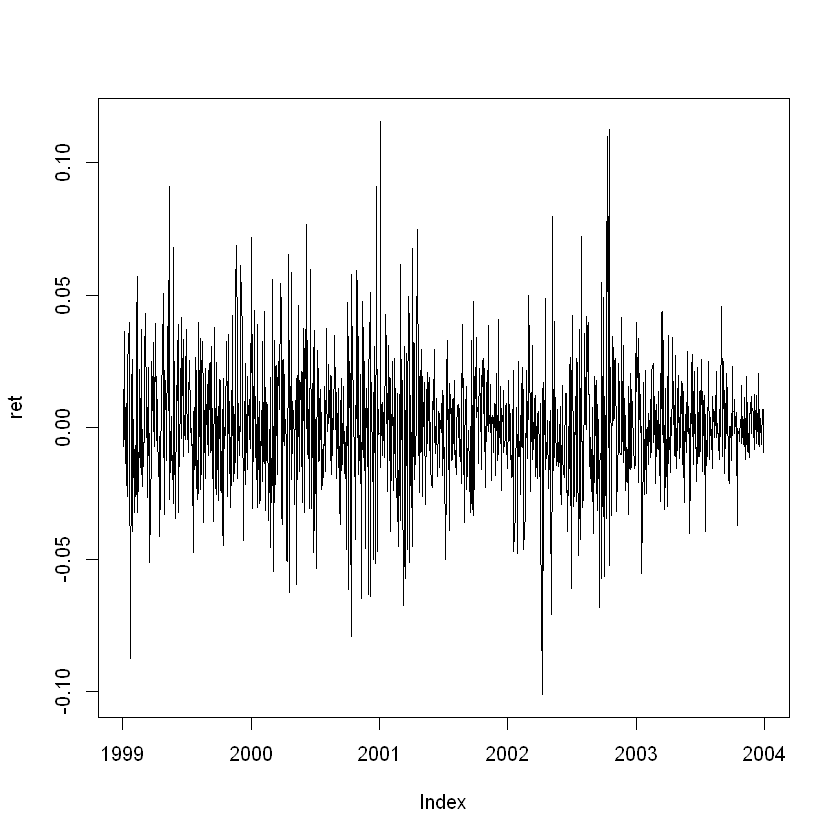

In [21]:
plot(ret)

In [22]:
print(what)
print(ahat)
print(bhat)

       omega 
3.329828e-06 
    alpha1 
0.05654917 
    beta1 
0.9384645 


In [23]:
IBM_GARCH_LogLik = 2983.448

__IBM GJR-GARCH__

In [24]:
spec2 <- ugarchspec(variance.model=list(model = "gjrGARCH", garchOrder=c(1,1,1)), mean.model=list(armaOrder=c(0,0), include.mean=F))
fit2 <- ugarchfit(data=ret, spec=spec2, solver="hybrid")

vals <- coef(fit2)
what <- coef(fit2)[1]
ahat <- coef(fit2)[2]
bhat <- coef(fit2)[3]
ghat <- coef(fit2)[4]

In [25]:
print(what)
print(ahat)
print(bhat)
print(ghat)

      omega 
1.66535e-06 
     alpha1 
0.005284374 
    beta1 
0.9582324 
    gamma1 
0.07096481 


In [26]:
IBM_GJR_LogLik = 2998.049

In [27]:
IBM_GJR_LogLik/IBM_GARCH_LogLik

[1] 1.004894